# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms**

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



# Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning ***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting, Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [132]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
from bs4 import BeautifulSoup
from shutil import unpack_archive
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score

In [27]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

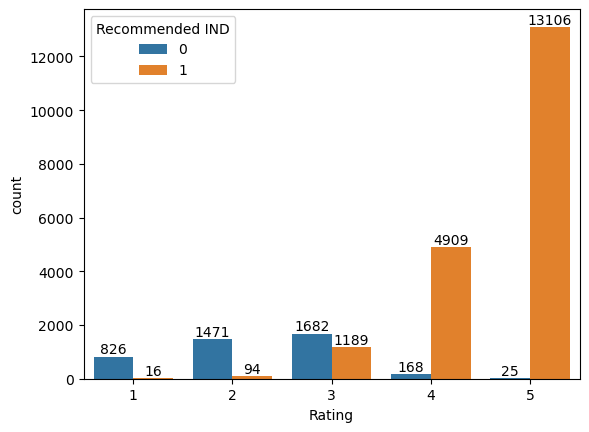

In [28]:
figsize = (10, 6)
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:        # "0" are negative comments, "1" are positive comments. 
    ax.bar_label(p)

In business, the ratings "1" and "2" are considered negative comments, "4" and "5" are positive commenrs. 
"3" is neither posotive nor negative.

In [29]:
df["Recommended IND"].unique()

array([1, 0])

We can remove whoese rating is negative and recommended and whose rating is positive but not recommended rows. We can also drop whose rating "3" and recommended. 

In [30]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

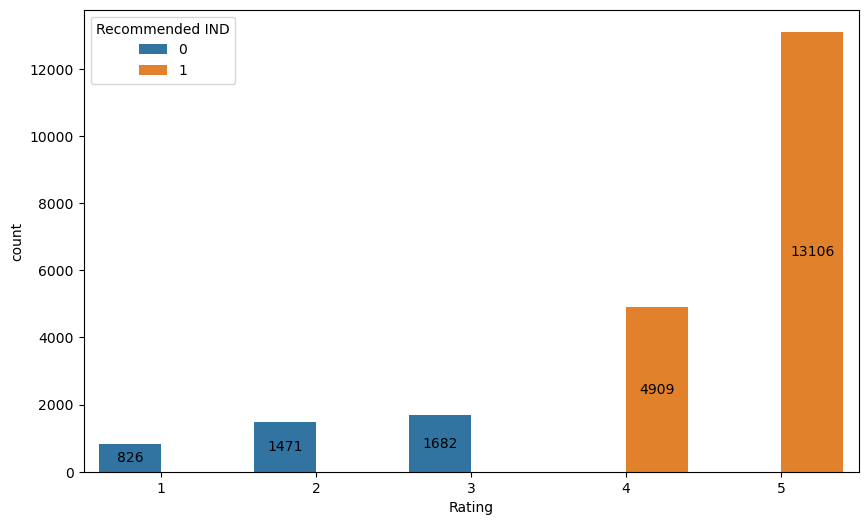

In [31]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p, label_type="center")

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

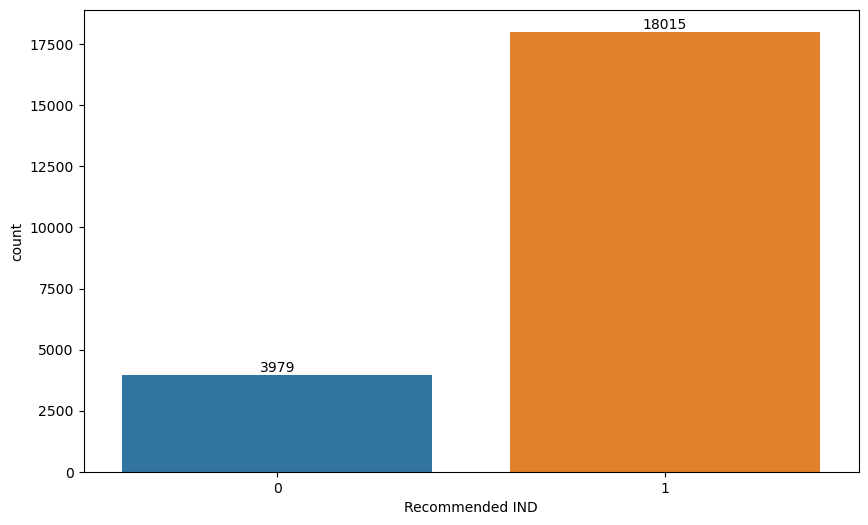

In [32]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [33]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"}, inplace=True)

In [34]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [38]:
df_new=df[['text','label']]
df_new

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23479,So i wasn't sure about ordering this skirt bec...,1
23480,NaN,1
23481,I was very happy to snag this dress at such a ...,1
23483,"This fit well, but the top was very see throug...",0


### Missing Value Detection

In [59]:
df_new.isnull().sum()

text     819
label      0
dtype: int64

In [60]:
df_new.dropna(inplace = True)
df_new.reset_index(drop=True, inplace=True)
df_new

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


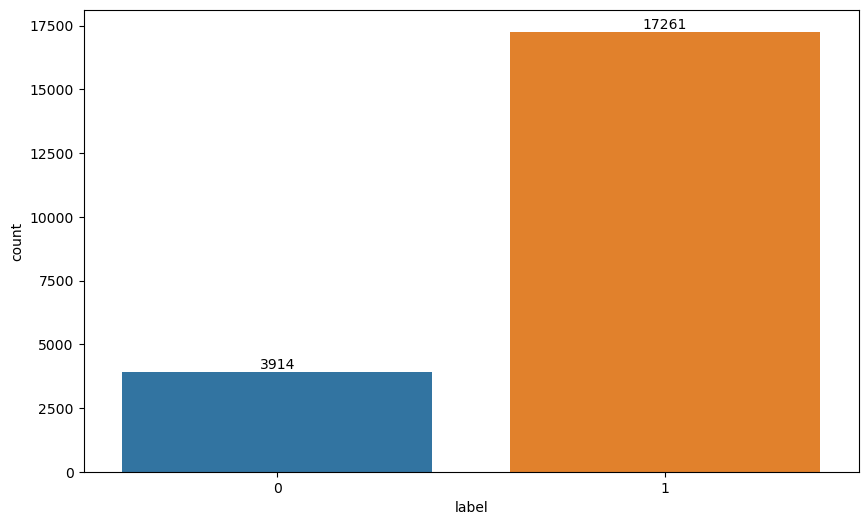

In [61]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="label", data=df_new)
ax.bar_label(ax.containers[0]);

## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.


- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Code clean up

We will use the following function to cleanup the data

In [83]:
def clean_text(text, remove_stopwords=False):
    # Remove HTML tags
    text = BeautifulSoup(text, "lxml").get_text()
    
    # Remove "@..." mentions
    text = re.sub("@[A-Za-z0-9_]+","", text)

    # Remove URLs that start with http, https or just www
    text = re.sub("https?://[^ ]+","",text)
    text = re.sub("www.[^ ]+","",text)

    # Decode and replace unicode unrecognisable special characters with u"\ufffd"
    try:
        text = text.decode("utf-8-sig")
    except:
        pass

    # now replace u"\ufffd" with "?"
    text.replace(u"\ufffd", "?")

    # TODO: Keep or replace emoticons and exclamations, etc. with text
    
    # Remove non-letters
    text = re.sub("[^a-zA-Z]"," ", text)
    
    # Convert text to lower case and tokenize them
    words = WordPunctTokenizer().tokenize(text.lower())

    # Remove stop words (false by default)
    if remove_stopwords:
        words = [w for w in words if w not in set(stopwords.words("english"))]
    
    # Lemmatize words 
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in words]
    
    # Join back the list of words
    cleaned_text = (" ".join(text_cleaned)).strip()

    return cleaned_text

### Detect Reviews (positive and negative separately)

In [84]:
positive_sentences = df_new[df_new["label"] == 1]["text"]
positive_sentences = positive_sentences.apply(clean_text)
positive_sentences

0        absolutely wonderful silky and sexy and comfor...
1        love this dress it s sooo pretty i happened to...
3        i love love love this jumpsuit it s fun flirty...
4        this shirt is very flattering to all due to th...
6        i aded this in my basket at hte last mintue to...
                               ...                        
21168    these bottom are very cute but defiantly cheek...
21169    i m so impressed with the beautiful color comb...
21171    so i wasn t sure about ordering this skirt bec...
21172    i wa very happy to snag this dress at such a g...
21174    this dress in a lovely platinum is feminine an...
Name: text, Length: 17261, dtype: object

In [86]:
negative_sentences = df_new[df_new["label"] == 0]["text"]
negative_sentences = negative_sentences.apply(clean_text)
negative_sentences

2        i had such high hope for this dress and really...
5        i love tracy reese dress but this one is not f...
10       dress run small esp where the zipper area run ...
20       first of all this is not pullover styling ther...
22       loved the material but i didnt really look at ...
                               ...                        
21145    i tried these on because the color is really p...
21146    i wanted to love this jacket so soft and great...
21155    i purchased this for a very good price and i t...
21170    i wa surprised at the positive review for this...
21173    this fit well but the top wa very see through ...
Name: text, Length: 3914, dtype: object

### Collect Words (positive and negative separately)

In [107]:
positive_words = " ".join(positive_sentences)
positive_words[:10], len(positive_words)


('absolutely', 5007173)

In [88]:
negative_words = " ".join(negative_sentences)
negative_words[:100]

'i had such high hope for this dress and really wanted it to work for me i initially ordered the peti'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [93]:
wordcloud_positive = WordCloud(background_color="white", max_words =250)

In [94]:
wordcloud_positive.generate(positive_words)

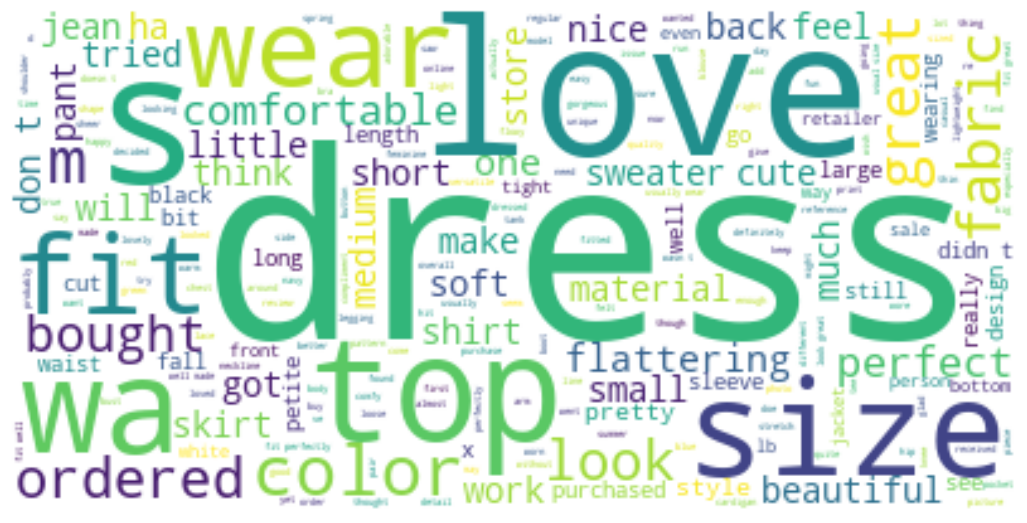

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear",)
plt.axis("off")
plt.show()

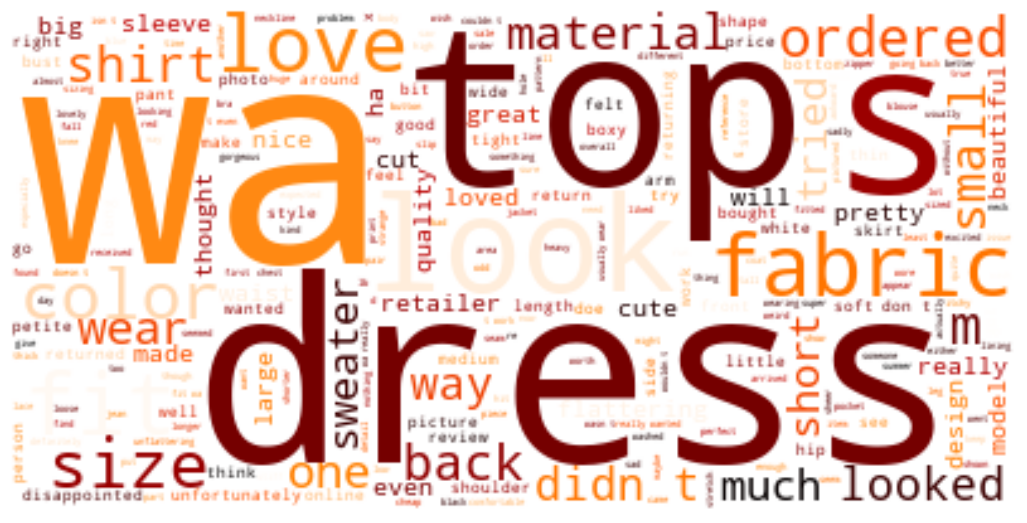

In [96]:
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning and Deep Learning

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 
**For BERT model, use TF tensor.**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting,
- Deep Learning Model,
- BERT Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [98]:
X = df_new["text"].values # array e cevirince ML ve DL de daha iyi çalısır.
y = df_new["label"].map({0:1, 1:0}).values # skorları 1 label üzerinden takip ediyoruz.

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 24)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [103]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # cleaning işlemi dönüşüm esnasında otomatik yapıyor. min_df 3 ve daha fazla..
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [104]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [105]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,ab,abby,ability,able,abo,absolute,absolutely,abstract,absurd,abt,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [109]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor = clean_text, min_df = 3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [110]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,ability,able,abo,about,above,absolute,absolutely,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Eval functions

In [147]:
def train_test_split_model(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    acc_score = accuracy_score(y_train, y_pred_train)
    print("accuracy_score={}".format(acc_score))
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [148]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C = 0.01, max_iter = 1000, class_weight = "balanced", random_state = 24)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=24)

In [149]:
print("Logistic Regression Model with Count Vectorizer")
train_test_split_model(log, X_train_count, X_test_count)

Logistic Regression Model with Count Vectorizer
accuracy_score=0.878963702604237
[[4547  632]
 [ 179  995]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5179
           1       0.61      0.85      0.71      1174

    accuracy                           0.87      6353
   macro avg       0.79      0.86      0.81      6353
weighted avg       0.90      0.87      0.88      6353

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     12082
           1       0.62      0.89      0.73      2740

    accuracy                           0.88     14822
   macro avg       0.80      0.88      0.83     14822
weighted avg       0.91      0.88      0.89     14822



In [150]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

model = LogisticRegression(C = 0.01, max_iter = 1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.866549
test_precision-1    0.596970
test_recall-1       0.858759
test_f1-1           0.704147
dtype: float64

In [151]:
#!pip install yellowbrick

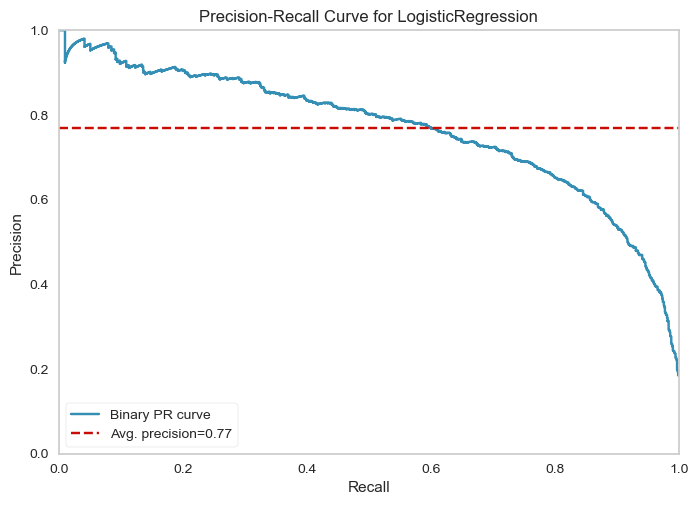

In [152]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.01, max_iter = 1000, class_weight= "balanced", random_state = 24),
    classes = log.classes_,
    per_class = True,
    cmap = "Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [153]:
y_pred = log.predict(X_test_count)
log_AP_count = viz.score_
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

y_pred, log_AP_count, log_count_rec, log_count_f1

(array([0, 1, 1, ..., 0, 0, 0]),
 0.7682093572481907,
 0.8475298126064736,
 0.7104605498036416)

### TF-IDF

In [154]:
log = LogisticRegression(C = 0.06, max_iter = 1000, random_state = 24, class_weight = "balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=24)

In [155]:
print("Logistic Regression Model TF-IDF")
train_test_split_model(log, X_train_tf_idf, X_test_tf_idf)

Logistic Regression Model TF-IDF
accuracy_score=0.871677236540278
[[4498  681]
 [ 164 1010]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      5179
           1       0.60      0.86      0.71      1174

    accuracy                           0.87      6353
   macro avg       0.78      0.86      0.81      6353
weighted avg       0.90      0.87      0.88      6353

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     12082
           1       0.60      0.90      0.72      2740

    accuracy                           0.87     14822
   macro avg       0.79      0.88      0.82     14822
weighted avg       0.91      0.87      0.88     14822



In [156]:
model = LogisticRegression(C = 0.06, max_iter = 1000, random_state = 24, class_weight = "balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.862704
test_precision-1    0.585932
test_recall-1       0.879562
test_f1-1           0.703267
dtype: float64

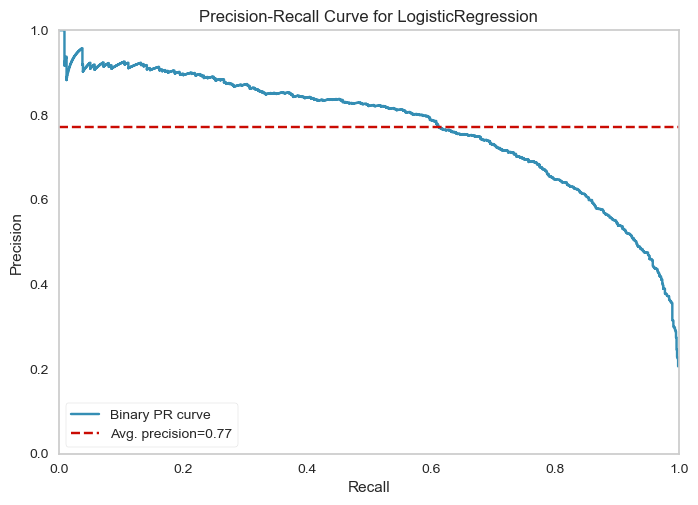

In [157]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.06, max_iter = 1000, random_state = 24, class_weight = "balanced"),
    classes = log.classes_,
    per_class = True,
    cmap = "Set1")
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [158]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

y_pred, log_AP_tfidf, log_tfidf_rec, log_tfidf_f1

(array([0, 1, 0, ..., 0, 0, 1]),
 0.7724940480479939,
 0.8603066439522998,
 0.705061082024433)

## Naive Bayes 

### Countvectorizer

In [159]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB(alpha = 0.7)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=0.7)

In [161]:
print("Naive Bayes Model with Count Vectorizer")
train_test_split_model(nb, X_train_count, X_test_count)

Naive Bayes Model with Count Vectorizer
accuracy_score=0.9230198353798408
[[4853  326]
 [ 262  912]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5179
           1       0.74      0.78      0.76      1174

    accuracy                           0.91      6353
   macro avg       0.84      0.86      0.85      6353
weighted avg       0.91      0.91      0.91      6353

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     12082
           1       0.76      0.86      0.80      2740

    accuracy                           0.92     14822
   macro avg       0.86      0.90      0.88     14822
weighted avg       0.93      0.92      0.92     14822



In [162]:
model = MultinomialNB(alpha = 0.7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.901632
test_precision-1    0.711658
test_recall-1       0.788686
test_f1-1           0.747844
dtype: float64

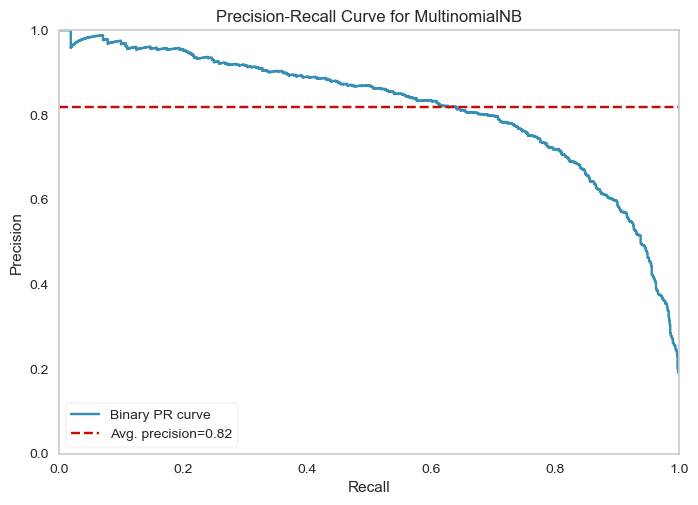

In [163]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=0.7),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [164]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [166]:
nb = BernoulliNB(alpha = 0.6)

nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.6)

In [167]:
print("Bernoulli Naive Bayes Model with TF-IDF")
train_test_split_model(nb, X_train_tf_idf, X_test_tf_idf)

Bernoulli Naive Bayes Model with TF-IDF
accuracy_score=0.9107407907165025
[[4773  406]
 [ 254  920]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      5179
           1       0.69      0.78      0.74      1174

    accuracy                           0.90      6353
   macro avg       0.82      0.85      0.84      6353
weighted avg       0.90      0.90      0.90      6353

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     12082
           1       0.72      0.84      0.78      2740

    accuracy                           0.91     14822
   macro avg       0.84      0.88      0.86     14822
weighted avg       0.92      0.91      0.91     14822



In [70]:
model = BernoulliNB(alpha=0.6)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy       0.898937
test_precision-1    0.704892
test_recall-1       0.780580
test_f1-1           0.740694
dtype: float64

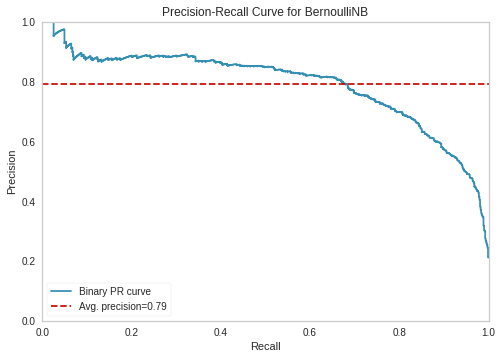

In [71]:
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=0.6),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [168]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [170]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 0.001, class_weight = "balanced", random_state = 24)

svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=24)

In [171]:
print("Support Vector Machine Model with Countvectorizer")
train_test_split_model(svc, X_train_count, X_test_count)

Support Vector Machine Model with Countvectorizer
accuracy_score=0.8812575900688167
[[4554  625]
 [ 178  996]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5179
           1       0.61      0.85      0.71      1174

    accuracy                           0.87      6353
   macro avg       0.79      0.86      0.82      6353
weighted avg       0.90      0.87      0.88      6353

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     12082
           1       0.62      0.90      0.74      2740

    accuracy                           0.88     14822
   macro avg       0.80      0.89      0.83     14822
weighted avg       0.91      0.88      0.89     14822



In [172]:
model = LinearSVC(C = 0.001, class_weight = "balanced", random_state = 24)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.868573
test_precision-1    0.601234
test_recall-1       0.861314
test_f1-1           0.707991
dtype: float64

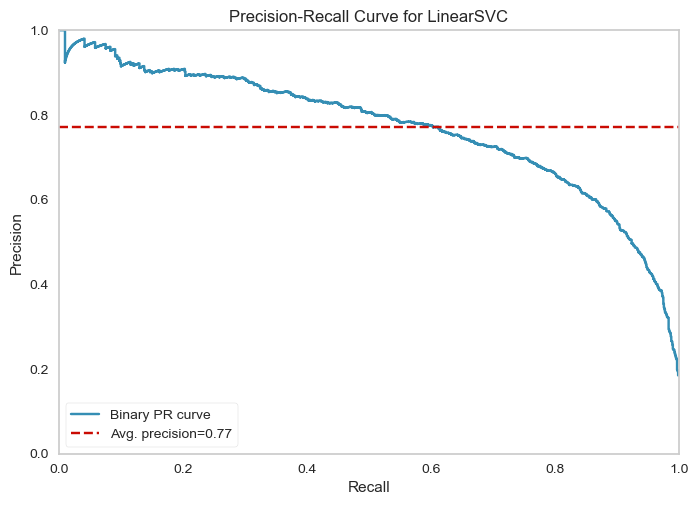

In [173]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [174]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [176]:
svc = LinearSVC(C = 0.03, class_weight = "balanced", random_state = 24)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=24)

In [177]:
print("Support Vector Machine Model with TF-IDF")
train_test_split_model(svc, X_train_tf_idf, X_test_tf_idf)

Support Vector Machine Model with TF-IDF
accuracy_score=0.8979894751045743
[[4624  555]
 [ 148 1026]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      5179
           1       0.65      0.87      0.74      1174

    accuracy                           0.89      6353
   macro avg       0.81      0.88      0.84      6353
weighted avg       0.91      0.89      0.90      6353

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     12082
           1       0.66      0.93      0.77      2740

    accuracy                           0.90     14822
   macro avg       0.82      0.91      0.85     14822
weighted avg       0.92      0.90      0.90     14822



In [178]:
model = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.883551
test_precision-1    0.630991
test_recall-1       0.892336
test_f1-1           0.739207
dtype: float64

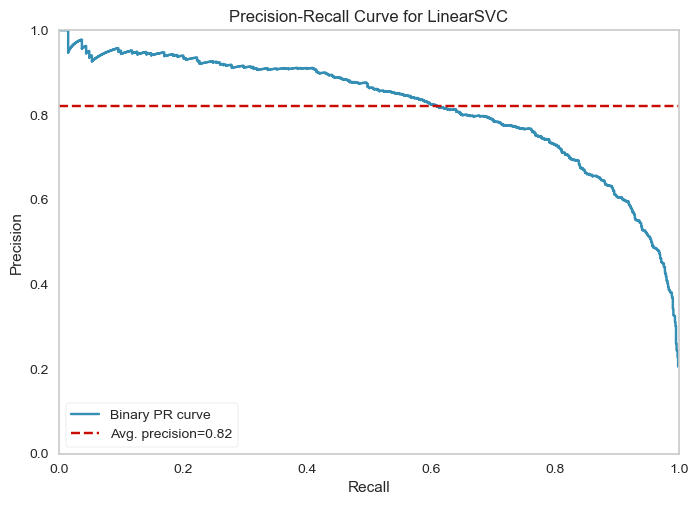

In [179]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.03, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [180]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [181]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, max_depth = 9, random_state = 24, n_jobs = -1, class_weight="balanced")

rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=24)

In [182]:
print("Random Forest Model with Countvectorizer")
train_test_split_model(rf, X_train_count, X_test_count)

Random Forest Model with Countvectorizer
accuracy_score=0.8782215625421671
[[4499  680]
 [ 193  981]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      5179
           1       0.59      0.84      0.69      1174

    accuracy                           0.86      6353
   macro avg       0.77      0.85      0.80      6353
weighted avg       0.89      0.86      0.87      6353

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     12082
           1       0.62      0.89      0.73      2740

    accuracy                           0.88     14822
   macro avg       0.80      0.88      0.83     14822
weighted avg       0.91      0.88      0.89     14822



In [183]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.859194
test_precision-1    0.586498
test_recall-1       0.812044
test_f1-1           0.680872
dtype: float64

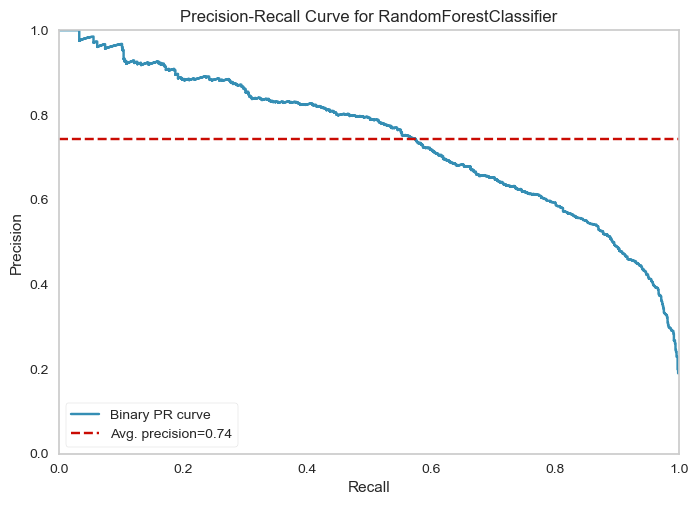

In [184]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [185]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [187]:
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [188]:
print("Random Forest Model with TF-IDF")
train_test_split_model(rf, X_train_tf_idf, X_test_tf_idf)

Random Forest Model with TF-IDF
accuracy_score=0.8958305221967345
[[4550  629]
 [ 260  914]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      5179
           1       0.59      0.78      0.67      1174

    accuracy                           0.86      6353
   macro avg       0.77      0.83      0.79      6353
weighted avg       0.88      0.86      0.87      6353

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     12082
           1       0.66      0.89      0.76      2740

    accuracy                           0.90     14822
   macro avg       0.82      0.90      0.85     14822
weighted avg       0.92      0.90      0.90     14822



In [189]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.857104
test_precision-1    0.584923
test_recall-1       0.787956
test_f1-1           0.671115
dtype: float64

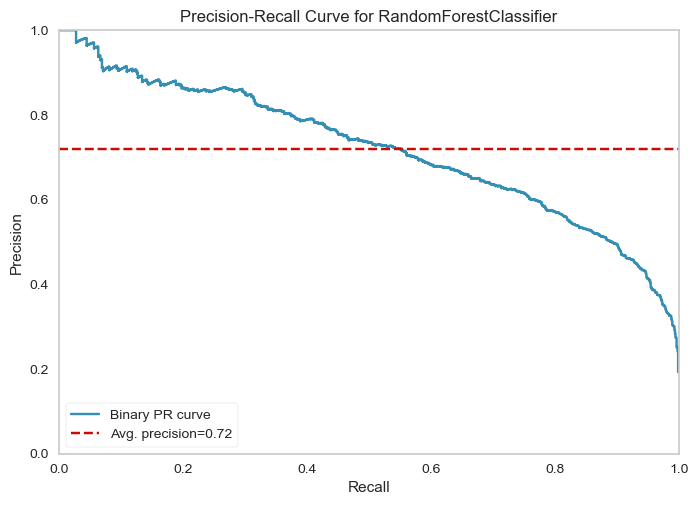

In [190]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [191]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [192]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 500, random_state = 24, learning_rate = 0.8)

ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=24)

In [193]:
print("Ada Boosting Model Countvectorizer")
train_test_split_model(ada, X_train_count, X_test_count)

Ada Boosting Model Countvectorizer
accuracy_score=0.9269329375253003
[[4982  197]
 [ 422  752]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5179
           1       0.79      0.64      0.71      1174

    accuracy                           0.90      6353
   macro avg       0.86      0.80      0.82      6353
weighted avg       0.90      0.90      0.90      6353

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     12082
           1       0.86      0.72      0.78      2740

    accuracy                           0.93     14822
   macro avg       0.90      0.85      0.87     14822
weighted avg       0.92      0.93      0.92     14822



In [194]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 24, learning_rate=0.8)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.898395
test_precision-1    0.777001
test_recall-1       0.632482
test_f1-1           0.697135
dtype: float64

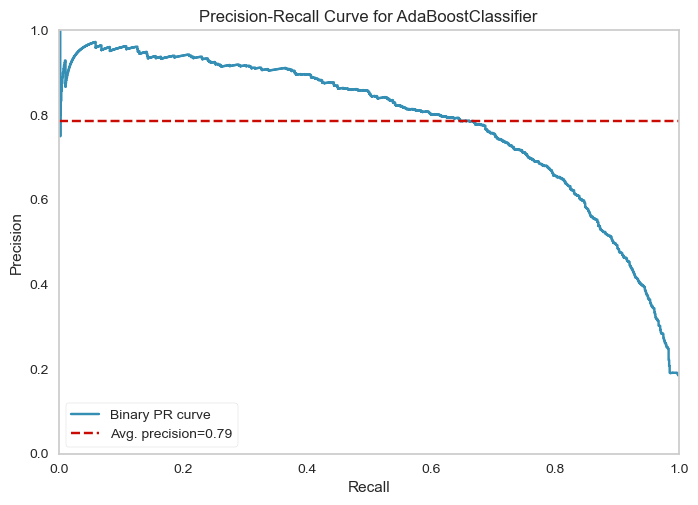

In [195]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [196]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [197]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=200, random_state=42)

In [198]:
print("Ada Boosting Model TF-IDF")
train_test_split_model(ada, X_train_tf_idf, X_test_tf_idf)

Ada Boosting Model TF-IDF
accuracy_score=0.9171501821616516
[[4984  195]
 [ 473  701]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      5179
           1       0.78      0.60      0.68      1174

    accuracy                           0.89      6353
   macro avg       0.85      0.78      0.81      6353
weighted avg       0.89      0.89      0.89      6353

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12082
           1       0.84      0.69      0.75      2740

    accuracy                           0.92     14822
   macro avg       0.88      0.83      0.85     14822
weighted avg       0.91      0.92      0.91     14822



In [199]:
model = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.895763
test_precision-1    0.769660
test_recall-1       0.622993
test_f1-1           0.688179
dtype: float64

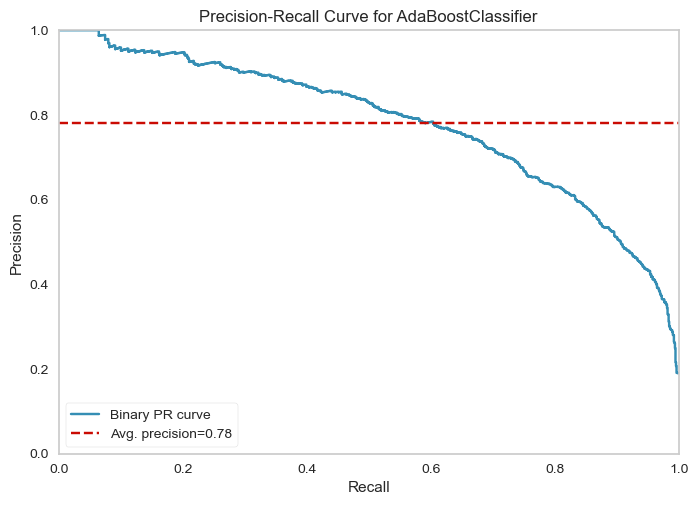

In [200]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators = 200, random_state = 42, learning_rate=0.8),
    classes = ada.classes_,
    per_class = True,
    cmap = "Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [204]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## Deep Learning Modeling

In [205]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [206]:
df_new

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


In [207]:
df.shape

(21994, 11)

### Tokenization

In [209]:
num_words = 15000 # we will use first 15000 most used words
tokenizer = Tokenizer(num_words = num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 

In [210]:
tokenizer.fit_on_texts(X)

### Creating word index

In [211]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [212]:
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [213]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [214]:
X[100]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [215]:
print(X_num_tokens[100])

[1, 80, 6, 473, 30, 5, 6, 390, 2, 24, 1, 1909, 486, 47, 3, 21, 5, 2, 238, 2140, 198, 190, 545, 14, 90, 3, 870, 311, 4, 276, 108, 5, 74, 124, 8, 22, 30, 2, 240, 31, 4, 46, 9, 76, 102, 151, 5, 6, 1, 2848, 78, 149, 9, 1, 204, 2, 43, 318, 7, 25, 4, 264, 264]


### Maximum number of tokens for all documents¶

In [216]:
len(X_num_tokens[100])

63

In [217]:
len(X_num_tokens[150])

30

In [218]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [219]:
num_tokens.mean()

60.2330106257379

In [220]:
num_tokens.max()

116

In [221]:
num_tokens.argmax()

15213

In [222]:
X[15213]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [223]:
max_tokens = 116

In [224]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [227]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [228]:
X_pad.shape

(21175, 116)

In [229]:
np.array(X_num_tokens[500])

array([   2,  104,    7,   18,   11,    3,  280,  358,    9,    5,    2,
         92,  695,    3, 1300,   17,  859,   17, 1443,    2, 1908, 3320,
          2,  285,  228,   54,    2,  347,   24,   68,    7,   57,    3,
       1908, 3320,    8,   29, 2331,   14,   32, 1170,  325,    5,  166,
         34,    3, 1170,   16,  299,    2,   68,    5,   15,   34,   12,
          4,  320,  576,   74,  124,    8,   22,    2,   38,  734,  308,
        687,  868,    3,    2,   68,   17,  383,   22,  407,    7,  116,
         17,   95,   48,   51,   46])

In [230]:
X_pad[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    2,  104,    7,   18,   11,    3,  280,  358,    9,    5,
          2,   92,  695,    3, 1300,   17,  859,   17, 1443,    2, 1908,
       3320,    2,  285,  228,   54,    2,  347,   24,   68,    7,   57,
          3, 1908, 3320,    8,   29, 2331,   14,   32, 1170,  325,    5,
        166,   34,    3, 1170,   16,  299,    2,   68,    5,   15,   34,
         12,    4,  320,  576,   74,  124,    8,   22,    2,   38,  734,
        308,  687,  868,    3,    2,   68,   17,  383,   22,  407,    7,
        116,   17,   95,   48,   51,   46], dtype=int32)

In [231]:
np.array(X_num_tokens[15213])

array([   2,   21,  759,  222,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  192,    1,  438,  222,   20,  362,   62,
          2,  522,    8,   17,  485,  105,    8,  180,   57,   11,   37,
        107,    4,   82,    9,    4,   25,  425,    9,    4,  242,   61,
        419,   41,  114,   67,    4,   82,    8,  180,   15,    2,  104,
          5,    9,    1,  120,  769,    2,  117,  804,  113,    1,   25,
         11,    5,  166,   28,    2,   16, 1633,  527,  160,   13,    1,
         25,    2, 3982, 1761,    1,   22,    3,    5,   16,    4,   82,
         33,    4, 1396,    1,   25,    6,   51,   71,   54,   40,   26,
          1,  523,   78,  676,   35,  593,  143,   42,    4,   22,   35,
        265,   54,   40,   26,  107,    4])

In [232]:
X_pad[15213]

array([   2,   21,  759,  222,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  192,    1,  438,  222,   20,  362,   62,
          2,  522,    8,   17,  485,  105,    8,  180,   57,   11,   37,
        107,    4,   82,    9,    4,   25,  425,    9,    4,  242,   61,
        419,   41,  114,   67,    4,   82,    8,  180,   15,    2,  104,
          5,    9,    1,  120,  769,    2,  117,  804,  113,    1,   25,
         11,    5,  166,   28,    2,   16, 1633,  527,  160,   13,    1,
         25,    2, 3982, 1761,    1,   22,    3,    5,   16,    4,   82,
         33,    4, 1396,    1,   25,    6,   51,   71,   54,   40,   26,
          1,  523,   78,  676,   35,  593,  143,   42,    4,   22,   35,
        265,   54,   40,   26,  107,    4], dtype=int32)

### Train Set Split

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.3, stratify=y, random_state = 24)

### Modeling

In [262]:
from keras.models import Sequential, load_model, model_from_json
model = Sequential()

In [263]:
embedding_size = 50

In [264]:
model.add(Embedding(input_dim = num_words,
                    output_dim = embedding_size,
                    input_length = max_tokens))


model.add(GRU(units = 48, return_sequences = True))
#model.add(Dropout(0.5))
#model.add(GRU(units=24, return_sequences=True))
#model.add(Dropout(0.5))
model.add(GRU(units = 24))
model.add(Dense(1, activation = 'sigmoid'))

In [266]:
model.compile(loss = 'binary_crossentropy',
              optimizer='adam',
              metrics = ["Recall"])

In [267]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 116, 50)           750000    
                                                                 
 gru_4 (GRU)                 (None, 116, 48)           14400     
                                                                 
 gru_5 (GRU)                 (None, 24)                5328      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 769,753
Trainable params: 769,753
Non-trainable params: 0
_________________________________________________________________


In [268]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, Dropout, concatenate, Activation, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding
from keras.models import load_model, Model

early_stop = EarlyStopping(monitor = "val_recall", mode = "max", 
                           verbose = 1, patience = 2, restore_best_weights = True)

In [269]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight = 'balanced', y = y_train)
pd.Series(classes_weights).unique()

array([0.61339182, 2.70474453])

In [270]:
model.fit(X_train, y_train, epochs = 25, batch_size = 128, sample_weight = classes_weights,
         validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/25
116/116 [==============================] - 18s 132ms/step - loss: 0.4778 - recall: 0.8011 - val_loss: 0.2442 - val_recall: 0.7845
Epoch 2/25
116/116 [==============================] - 15s 128ms/step - loss: 0.2438 - recall: 0.9197 - val_loss: 0.2651 - val_recall: 0.8535
Epoch 3/25
116/116 [==============================] - 14s 118ms/step - loss: 0.1686 - recall: 0.9566 - val_loss: 0.2625 - val_recall: 0.8288
Epoch 4/25
116/116 [==============================] - 16s 134ms/step - loss: 0.1274 - recall: 0.9745 - val_loss: 0.2633 - val_recall: 0.7956
Epoch 4: early stopping


### Model evaluation

In [271]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.477785,0.801095,0.244201,0.784497
1,0.243771,0.919708,0.265063,0.853492
2,0.168600,0.956569,0.262472,0.828790
3,0.127388,0.974453,0.263338,0.795571


<AxesSubplot:>

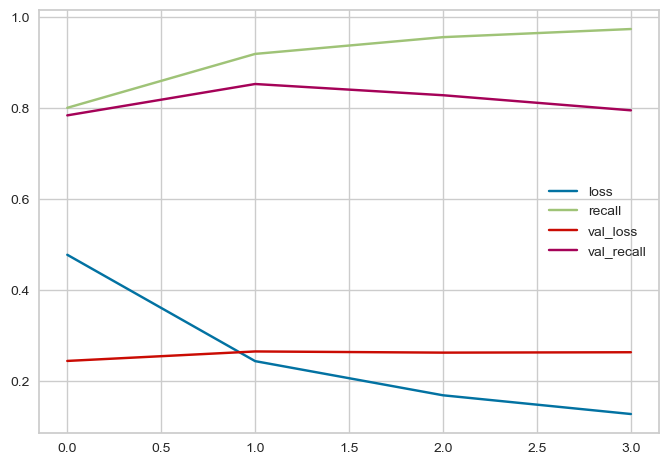

In [272]:
model_loss.plot()

In [273]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

464/464 [==============================] - 7s 14ms/step
[[11143   939]
 [   70  2670]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     12082
           1       0.74      0.97      0.84      2740

    accuracy                           0.93     14822
   macro avg       0.87      0.95      0.90     14822
weighted avg       0.95      0.93      0.94     14822



In [274]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

199/199 [==============================] - 3s 14ms/step
[[4675  504]
 [ 172 1002]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      5179
           1       0.67      0.85      0.75      1174

    accuracy                           0.89      6353
   macro avg       0.81      0.88      0.84      6353
weighted avg       0.91      0.89      0.90      6353



In [275]:
from sklearn.metrics import precision_recall_curve, average_precision_score

199/199 [==============================] - 3s 14ms/step


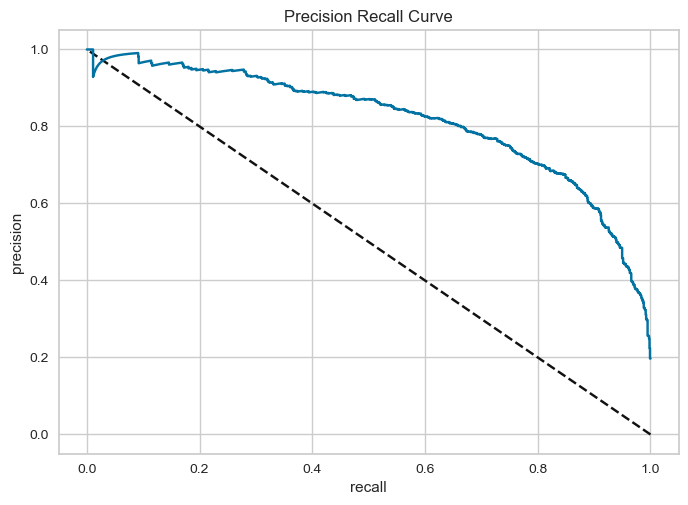

In [276]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [277]:
average_precision_score(y_test, y_pred_proba)

0.8180042847253999

In [278]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

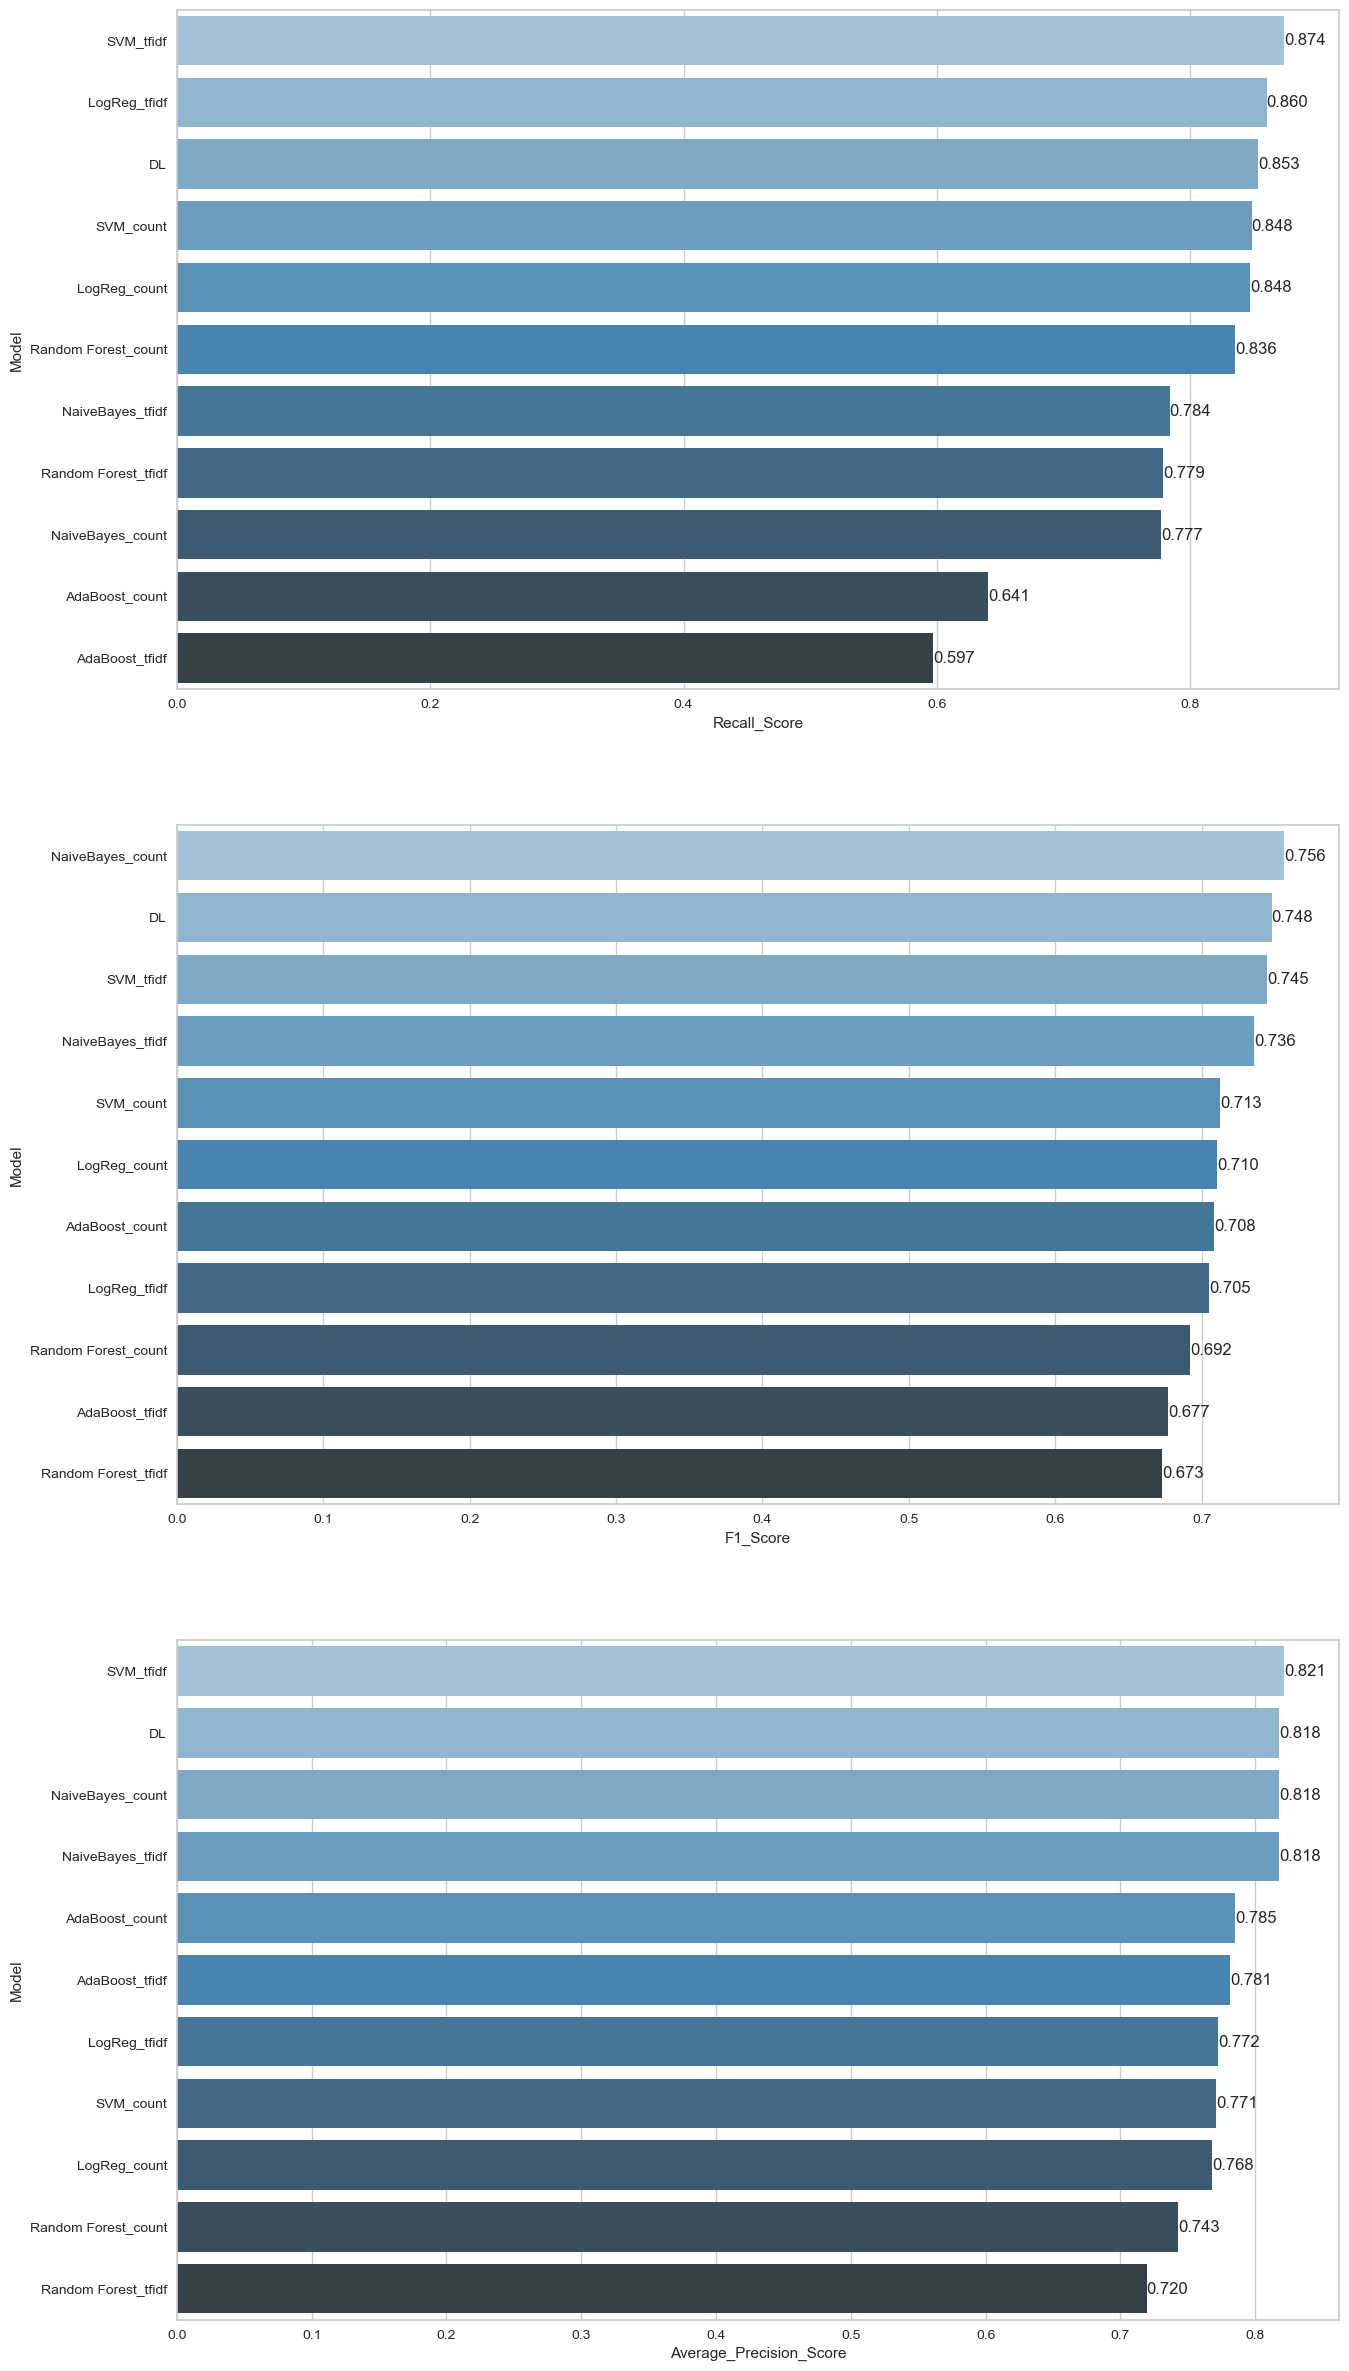

In [368]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();